In [8]:
# Use Jupyter Kernel venv Python 3.10.0   Ctrl+Shift+P

#Check version
#!pip -V

In [9]:
# Install Pydriller
# !pip install pydriller
# !pip install pandas

In [56]:
# Import repo
from pydriller import Repository

In [57]:
repo = Repository('https://github.com/jupelk/hadoop.git', only_in_branch='trunk', 
  only_modifications_with_file_types=['.java'], only_no_merge=True, clone_repo_to='c:\\CodeBook\\new_code_rework_TD', 
  filepath='hadoop-common-project/hadoop-common/*.java')

In [51]:
gen = repo.traverse_commits()
commit = next(iter(gen))

In [ ]:
[i.new_path for i in commit.modified_files]

In [ ]:
# pip install tqdm

In [71]:

new_row = pd.DataFrame({'hash': commit.hash, 'author': commit.author.name, 'author_date': commit.author_date, 
    'committer': commit.committer.name, 'committer_date': commit.committer_date, 'msg': commit.msg, 'parents': commit.parents, 
    'files': commit.files
    })

# new_row.at[0, 'modified_files'] = [(file.filename, ' has changed', file.change_type, file.added_lines, file.deleted_lines, [j.name for j in file.changed_methods], file.nloc) for file in commit.modified_files]


In [74]:
new_row['modified_files'] = new_row['modified_files'].astype(object)

In [76]:
new_row.at[0, 'modified_files'] = [(file.filename, ' has changed', file.change_type, file.added_lines, [j.name for j in file.changed_methods], file.deleted_lines, file.nloc) for file in commit.modified_files]

In [83]:
newDf = pd.DataFrame({'test': ['test','test'], 'test1': None})
new_row['test1'] = new_row['test1'].astype(object)

new_row.at[0, 'test1'] = ['test,', 's', 'ss']

In [84]:
# Save list of commits to csv using pandas
import pandas as pd
# import progress bar
from tqdm import tqdm

df = pd.DataFrame(columns=['hash', 'author', 'author_date', 'committer', 'committer_date', 'msg', 'parents', 'files', 'modified_files'])
for commit in tqdm(repo.traverse_commits()):
    new_row = pd.DataFrame({'hash': commit.hash, 'author': commit.author.name, 'author_date': commit.author_date, 
    'committer': commit.committer.name, 'committer_date': commit.committer_date, 'msg': commit.msg, 'parents': commit.parents, 
    'files': commit.files, 'modified_files': None
    })
    new_row['modified_files'] = new_row['modified_files'].astype(object)
    new_row.at[0, 'modified_files'] = [(file.filename, ' has changed', file.change_type, file.added_lines, [j.name for j in file.changed_methods], file.deleted_lines, file.nloc) for file in commit.modified_files]
    df = pd.concat((df, new_row), ignore_index=True)
    
    #stop after 10 commits
    if len(df) > 10:
        break

df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits.csv', index=False)


10it [02:32, 15.21s/it]


In [85]:
len(df)

11

In [90]:
df['modified_files'][5]

[('CHANGES.txt', ' has changed', <ModificationType.MODIFY: 5>, 3, [], 0, None),
 ('FileUtil.java',
  ' has changed',
  <ModificationType.MODIFY: 5>,
  2,
  ['FileUtil::fullyDeleteContents', 'FileUtil::fullyDelete'],
  3,
  494),
 ('RawLocalFileSystem.java',
  ' has changed',
  <ModificationType.MODIFY: 5>,
  13,
  ['RawLocalFileSystem::listStatus',
   'RawLocalFileSystem::getFileStatus',
   'RawLocalFileSystem::append',
   'RawLocalFileSystem::create',
   'RawLocalFileSystem::delete'],
  6,
  420),
 ('RunJar.java',
  ' has changed',
  <ModificationType.MODIFY: 5>,
  1,
  ['RunJar::main'],
  4,
  134),
 ('FileSystemTestHelper.java',
  ' has changed',
  <ModificationType.MODIFY: 5>,
  26,
  ['FileSystemTestHelper::writeFile',
   'FileSystemTestHelper::readFile',
   'FileSystemTestHelper::writeFile',
   'FileSystemTestHelper::readFile'],
  17,
  155),
 ('TestChecksumFileSystem.java',
  ' has changed',
  <ModificationType.MODIFY: 5>,
  19,
  ['TestChecksumFileSystem::testTruncatedChecksum'

In [ ]:
# Save list of commits to csv using pandas
import pandas as pd
# import modfication type
from pydriller.domain.commit import ModificationType
# import progress bar
from tqdm import tqdm

df = pd.DataFrame(columns=['hash', 'author', 'author_date', 'committer', 'committer_date', 'msg', 'parents', 'files', 'modified_files'])
for commit in tqdm(repo.traverse_commits()):
    new_row = pd.DataFrame({'hash': commit.hash, 'author': commit.author.name, 'author_date': commit.author_date, 
    'committer': commit.committer.name, 'committer_date': commit.committer_date, 'msg': commit.msg, 'parents': commit.parents, 
    'files': commit.files, 'modified_files': None })
    new_row['modified_files'] = new_row['modified_files'].astype(object)
    new_row.at[0, 'modified_files'] = [(file.filename, file.change_type, file.added_lines, 
        [j.name for j in file.changed_methods], file.deleted_lines, file.nloc) for file in commit.modified_files 
            if file.change_type != ModificationType.RENAME and file.filename.endswith('.java')]
    if new_row['modified_files'][0] != []:
        df = pd.concat((df, new_row), ignore_index=True)
        
    #stop after 10 commits
    if len(df) > 10:
       break

df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits.csv', index=False)


In [98]:
#file.filename
test = 'test.java' 
test.split('.')[-1] == 'java'
test.endswith('.java') 

True

In [104]:
test[2:]

'st.java'

In [106]:
#check length of resulting array
len(df)

#write to csv
df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits.csv', index=False)

In [109]:
# Save list of commits to csv using pandas
import pandas as pd
# import modfication type
from pydriller.domain.commit import ModificationType
# import progress bar
from tqdm import tqdm

df = pd.DataFrame(columns=['hash', 'author', 'author_date', 'committer', 'committer_date', 'msg', 'parents', 'files', 'modified_java_files', 'num_of_modified_java_files'])
for commit in tqdm(repo.traverse_commits()):
    new_row = pd.DataFrame({'hash': commit.hash, 'author': commit.author.name, 'author_date': commit.author_date, 
    'committer': commit.committer.name, 'committer_date': commit.committer_date, 'msg': commit.msg, 'parents': commit.parents, 
    'files': commit.files, 'modified_java_files': None,  'num_of_modified_java_files':0})
    new_row['modified_java_files'] = new_row['modified_java_files'].astype(object)
    new_row.at[0, 'modified_java_files'] = [(file.filename, file.change_type, file.added_lines, 
        [j.name for j in file.changed_methods], file.deleted_lines, file.nloc) for file in commit.modified_files 
            if file.change_type != ModificationType.RENAME and file.filename.endswith('.java')]
    new_row['num_of_modified_java_files'] = len(new_row['modified_java_files'][0])
    if new_row['modified_java_files'][0] != []:
        df = pd.concat((df, new_row), ignore_index=True)
    #stop after 10 commits
    #if len(df) > 10:
       #break

df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits.csv', index=False)


3756it [1:06:19,  1.06s/it]


In [114]:
df.loc[3730]

hash                                   696d0420543d5932d88c7dd42108e575d5405585
author                                                           Ashutosh Gupta
author_date                                           2022-11-21 05:54:50+00:00
committer                                                                GitHub
committer_date                                        2022-11-21 14:54:50+09:00
msg                           HADOOP-8728. Display (fs -text) shouldn't hard...
parents                                2e993fdf4e76ac18353b74b841362b58f4da61d5
files                                                                         2
modified_files                                                              NaN
modified_java_files           [(Display.java, ModificationType.MODIFY, 8, [D...
num_of_modified_java_files                                                  2.0
Name: 3730, dtype: object

In [113]:
len(df.loc[df['hash'=='38b2ed2151a77cb838ed5b4e1ae7bae3964e5590']]['modified_java_files'])

2

In [116]:
df.loc[df['hash']=='38b2ed2151a77cb838ed5b4e1ae7bae3964e5590']

,hash,author,author_date,committer,committer_date,msg,parents,files,modified_files,modified_java_files,num_of_modified_java_files
3714,38b2ed2151a77cb838ed5b4e1ae7bae3964e5590,Steve Loughran,2022-10-06 11:49:38+01:00,GitHub,2022-10-06 11:49:38+01:00,HADOOP-18442. Remove openstack support (#4855)...,1a9faf123d920b7b0170a18b51cb274dca6aaed6,106,NaN,"[(TestCommonConfigurationFields.java, Modifica...",86.0


In [123]:
df.loc[df['hash']=='38b2ed2151a77cb838ed5b4e1ae7bae3964e5590']['modified_java_files'].apply(lambda x: len(str(x)))

3714    39060
Name: modified_java_files, dtype: int64

In [ ]:
df.loc[df['modified_java_files'].apply(lambda x: len(str(x))) > 32767]

# Old

In [ ]:
'TestSwiftFileSystemExtendedContract::testGetSchemeImplemented', 'TestSwiftFileSy

# Current

In [159]:
# Save list of commits to csv using pandas
import pandas as pd
# import modfication type
from pydriller.domain.commit import ModificationType
# import progress bar
from tqdm import tqdm

def get_df_from_rows(data):
    return pd.DataFrame(columns=['hash', 'author', 'author_date', 'committer', 'committer_date', 'msg', 'parents', 'num_of_files', 'num_of_modified_java_files', 'modified_java_files', 'file_name', 'change_type', 'changed_methods', 'added_lines', 'deleted_lines', 'nloc', 'file_old_path', 'file_new_path'], data=data)


df = get_df_from_rows([])
for index, commit in enumerate(repo.traverse_commits()):
    new_rows = [{'hash': commit.hash, 'author': commit.author.name, 'author_date': commit.author_date, 
    'committer': commit.committer.name, 'committer_date': commit.committer_date, 'msg': commit.msg, 'parents': commit.parents, 
    'num_of_files': commit.files, 'num_of_modified_java_files':0, 'modified_java_files': None,
    'file_name': None, 'change_type': None, 'changed_methods': None, 'added_lines': None, 'deleted_lines': None, 'nloc': None, 
    'file_old_path': None, 'file_new_path': None}]

    #new_row['modified_java_files'] = new_row['modified_java_files'].astype(object)
    #new_row['num_of_modified_java_files'] = len(new_row['modified_java_files'][0])

    for file in commit.modified_files:
        if file.change_type != ModificationType.RENAME and file.filename.endswith('.java'):
            new_rows.append({'file_name': file.filename, 'change_type': file.change_type, 
            'changed_methods': str([j.name for j in file.changed_methods]), 'added_lines': file.added_lines, 'deleted_lines': file.deleted_lines, 
            'nloc': file.nloc, 'file__old_path': file._old_path, 'file_new_path': file._new_path})
    df = pd.concat((df, get_df_from_rows(new_rows)), ignore_index=True)
        
    #stop after 10 commits
    if index > 10:
       break

#write to csv
df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits.csv', index=False)


In [153]:
test_df = pd.DataFrame(columns=['hash', 'file_info'], data=[{'hash': '111'}, {'file_info': 'file1'},  {'file_info': 'file2'}])
test_df

,hash,file_info
0,111,NaN
1,NaN,file1
2,NaN,file2


In [151]:
test_df

,hash,author
0,111,NaN
1,222,test


In [154]:
def get_rows(data):
    return pd.DataFrame(columns=['hash', 'author', 'author_date', 'committer', 'committer_date', 'msg', 'parents', 'num_of_files', 'num_of_modified_java_files', 'modified_java_files', 'file_name', 'change_type', 'changed_methods', 'added_lines', 'deleted_lines', 'nloc', 'file_old_path', 'file_new_path'], data=data)


df = get_rows([])

In [155]:
df

,hash,author,author_date,committer,committer_date,msg,parents,num_of_files,num_of_modified_java_files,modified_java_files,file_name,change_type,changed_methods,added_lines,deleted_lines,nloc,file_old_path,file_new_path


In [157]:
df

,hash,author,author_date,committer,committer_date,msg,parents,num_of_files,num_of_modified_java_files,modified_java_files,file_name,change_type,changed_methods,added_lines,deleted_lines,nloc,file_old_path,file_new_path
0,cd7157784e5e5ddc4e77144d042e54dd0d04bac1,Arun Murthy,2011-08-25 00:14:24+00:00,Arun Murthy,2011-08-25 00:14:24+00:00,HADOOP-7560. Change src layout to be heirarchi...,[bb0005cfec5fd2861600ff5babd259b48ba18b63],4700,0,NaN,None,None,None,NaN,NaN,NaN,NaN,None
1,56dd8ba0b8218f36c01d5b8077aef7907535f649,Tsz-wo Sze,2011-08-26 06:58:52+00:00,Tsz-wo Sze,2011-08-26 06:58:52+00:00,HADOOP-7547. Add generic type in WritableCompa...,[23e7fc4f462ac07134d5ca59049f81e8f24830ea],21.0,0.0,NaN,None,None,None,NaN,NaN,NaN,NaN,None
2,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,BinaryComparable.java,ModificationType.MODIFY,[],3.0,0.0,33.0,NaN,hadoop-common-project\hadoop-common\src\main\j...
3,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,BooleanWritable.java,ModificationType.MODIFY,"['BooleanWritable::compareTo', 'BooleanWritabl...",8.0,3.0,60.0,NaN,hadoop-common-project\hadoop-common\src\main\j...
4,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,ByteWritable.java,ModificationType.MODIFY,"['ByteWritable::compareTo', 'ByteWritable::com...",8.0,3.0,56.0,NaN,hadoop-common-project\hadoop-common\src\main\j...
5,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,BytesWritable.java,ModificationType.MODIFY,[],4.0,0.0,119.0,NaN,hadoop-common-project\hadoop-common\src\main\j...
6,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,DoubleWritable.java,ModificationType.MODIFY,"['DoubleWritable::compareTo', 'DoubleWritable:...",8.0,4.0,59.0,NaN,hadoop-common-project\hadoop-common\src\main\j...
7,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,FloatWritable.java,ModificationType.MODIFY,"['FloatWritable::compareTo', 'FloatWritable::c...",8.0,4.0,55.0,NaN,hadoop-common-project\hadoop-common\src\main\j...
8,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,IntWritable.java,ModificationType.MODIFY,"['IntWritable::compareTo', 'IntWritable::compa...",13.0,5.0,57.0,NaN,hadoop-common-project\hadoop-common\src\main\j...
9,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,LongWritable.java,ModificationType.MODIFY,"['LongWritable::compareTo', 'LongWritable::com...",9.0,4.0,61.0,NaN,hadoop-common-project\hadoop-common\src\main\j...


In [6]:
# Save list of commits to csv using pandas
import pandas as pd
# import modfication type
from pydriller.domain.commit import ModificationType
# import progress bar
from tqdm import tqdm

def get_df_from_rows(data):
    return pd.DataFrame(columns=['hash', 'author', 'author_date', 'committer', 'committer_date', 'msg', 'parents', 'num_of_files', 'num_of_modified_java_files', 'modified_java_file_name', 'change_type', 'changed_methods', 'added_lines', 'deleted_lines', 'nloc', 'file_old_path', 'file_new_path'], data=data)


df = get_df_from_rows([])
for index, commit in enumerate(repo.traverse_commits()):
    new_rows = [{'hash': commit.hash, 'author': commit.author.name, 'author_date': commit.author_date, 
    'committer': commit.committer.name, 'committer_date': commit.committer_date, 'msg': commit.msg, 'parents': commit.parents, 
    'num_of_files': commit.files, 'num_of_modified_java_files':0, 
    'modified_java_file_name': None, 'change_type': None, 'changed_methods': None, 'added_lines': None, 'deleted_lines': None, 'nloc': None, 
    'file_old_path': None, 'file_new_path': None}]    

    count_java_files = 0
    for file in commit.modified_files:
        if file.change_type != ModificationType.RENAME and file.filename.endswith('.java'):
            count_java_files += 1
            new_rows.append({'modified_java_file_name': file.filename, 'change_type': file.change_type, 
            'changed_methods': str([j.name for j in file.changed_methods]), 'added_lines': file.added_lines, 'deleted_lines': file.deleted_lines, 
            'nloc': file.nloc, 'file__old_path': file._old_path, 'file_new_path': file._new_path})
    new_rows[0]['num_of_modified_java_files'] = count_java_files       
    df = pd.concat((df, get_df_from_rows(new_rows)), ignore_index=True)
    #df.at[index, 'num_of_modified_java_files'] = count_java_files
        
    #stop after 10 commits
    #if index > 10:
       #break

#write to csv
df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits.csv', index=False)


In [2]:
import pandas as pd
df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\commits.csv')


In [2]:
df.head(1)

,hash,author,author_date,committer,committer_date,msg,parents,num_of_files,num_of_modified_java_files,modified_java_file_name,change_type,changed_methods,added_lines,deleted_lines,nloc,file_old_path,file_new_path
0,cd7157784e5e5ddc4e77144d042e54dd0d04bac1,Arun Murthy,2011-08-25 00:14:24+00:00,Arun Murthy,2011-08-25 00:14:24+00:00,HADOOP-7560. Change src layout to be heirarchi...,['bb0005cfec5fd2861600ff5babd259b48ba18b63'],4700.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.loc[df['msg'].notna()].head(2)

,hash,author,author_date,committer,committer_date,msg,parents,num_of_files,num_of_modified_java_files,modified_java_file_name,change_type,changed_methods,added_lines,deleted_lines,nloc,file_old_path,file_new_path
0,cd7157784e5e5ddc4e77144d042e54dd0d04bac1,Arun Murthy,2011-08-25 00:14:24+00:00,Arun Murthy,2011-08-25 00:14:24+00:00,HADOOP-7560. Change src layout to be heirarchi...,['bb0005cfec5fd2861600ff5babd259b48ba18b63'],4700.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56dd8ba0b8218f36c01d5b8077aef7907535f649,Tsz-wo Sze,2011-08-26 06:58:52+00:00,Tsz-wo Sze,2011-08-26 06:58:52+00:00,HADOOP-7547. Add generic type in WritableCompa...,['23e7fc4f462ac07134d5ca59049f81e8f24830ea'],21.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#import JIRA instance
from jira import JIRA
from jira.exceptions import JIRAError

jira = JIRA(server="https://issues.apache.org/jira")

import re
pattern = re.compile(r'HADOOP-(\d+)')
counter = 0

def new_message(commit_msg):
    global counter
    if commit_msg.startswith("HADOOP-"):
        match = pattern.search(commit_msg)
        if match:
            counter += 1
            print(counter)
            # if counter >= 2487:
            try:
                print(commit_msg)
                issue = jira.issue(f"HADOOP-{match.group(1)}")
                print(issue.key)
                return issue
            except JIRAError as e:
                if "Issue Does Not Exist" in str(e):
                    return ""
                else:
                    print(str(e))
                    return ""
    return None

#def get_key(issue):
#    if issue:
#        return issue.key
#    return ""

try:
    df['msg'] = df['msg'].fillna('')
    issue = df['msg'].apply(new_message)
    print('Finishesd loading issues', len(issue))

    #df['jira issue key'] = issue.apply(get_key)
    df['jira issue key'] = issue.apply(lambda x: x.key if x else '')
    df['summary'] = issue.apply(lambda x: x.fields.summary if x else '')
    df['issue type'] = issue.apply(lambda x: x.fields.issuetype.name if x else '')
    df['status'] = issue.apply(lambda x: x.fields.status.name if x else '')
    df['resolution'] = issue.apply(lambda x: x.fields.resolution.name if x and x.fields.resolution else '')

except JIRAError as e:
    print(f"Error occured: {e}")

df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira.csv', index=False)



In [11]:
#df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira.csv', index=False)

In [3]:
import pandas as pd
df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira.csv')

In [ ]:
help(df.sample)

In [ ]:
#sampling: random sample of 500 commits

num_samples = 500
main_rows = df[df['hash'].notna()]
sample_rows = main_rows.sample(num_samples)

new_df = pd.DataFrame(columns=main_rows.columns)
for i in sample_rows.index:
    all_indices = main_rows.index.to_list()
    index_in_main_list = all_indices.index(i)
    print(all_indices[index_in_main_list], all_indices[index_in_main_list+1])
    new_df = pd.concat((new_df, df[all_indices[index_in_main_list]:all_indices[index_in_main_list+1]]))

new_df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira_sample.csv', index=False)

In [ ]:
new_df[new_df['hash'].notna()]

# sampling: sample of first 500 commits

In [49]:
#sampling: sample of first 500 commits

num_samples = 500
main_rows = df[df['hash'].notna()]
sample_rows = main_rows.tail(num_samples) #get latest commits

new_df = pd.DataFrame(columns=main_rows.columns)
for i in sample_rows.index:
    all_indices = main_rows.index.to_list()
    index_in_main_list = all_indices.index(i)
    #print(all_indices[index_in_main_list], all_indices[index_in_main_list+1])
    if index_in_main_list + 1 < len(all_indices):
        new_df = pd.concat((new_df, df[all_indices[index_in_main_list]:all_indices[index_in_main_list+1]])) #get the commit and all its files

new_df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira_sample_concsecutive_500.csv', index=False)


In [ ]:
print(sample_rows.index)

In [ ]:
#aggregate file level data to commit level

import pandas as pd
sample_df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira_sample_concsecutive_500.csv')
sample_df_main_rows = sample_df[sample_df['hash'].notna()]

sum_of_added_lines = 0
for i in sample_df_main_rows.index:
    all_sample_indices = sample_df_main_rows.index.to_list()
    index_in_sample_main_list = all_sample_indices.index(i)    
   
    if index_in_sample_main_list + 1 < len(all_sample_indices):
        for j in range(all_sample_indices[index_in_sample_main_list]+1, all_sample_indices[index_in_sample_main_list+1]):
            
        # add the 'added_lines' value for the current row to the sum
            sum_of_added_lines = int(sample_df.loc[j, 'added_lines']) + sum_of_added_lines
            print('sum_of_added_lines after traversing row ' + str(j) + ': ' + str(sum_of_added_lines))
    
    #stop after 35 rows
    if len(sample_df) > 35:
        break

#aggregated_sample_df = pd.concat((aggregated_sample_df, sample_df[all_sample_indices[index_in_sample_main_list]:all_sample_indices[index_in_sample_main_list+1]])) #get the commit and all its files

#aggregated_sample_df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira_sample_concsecutive_500_aggregated.csv', index=False)




In [72]:
sum_of_added_lines

nan

In [71]:
int(sample_df.loc[j, 'added_lines']) + sum_of_added_lines


nan

In [66]:
int(sample_df.loc[j, 'added_lines'])

33

In [ ]:
#aggregating values for added_lines, deleted_lines, nloc from file level to commit level
import pandas as pd

#def calculate_sum(df, start_index, end_index, column_name):
    #sum_of_added_lines = 0
    #for j in range(start_index + 1, end_index):
        #sum_of_added_lines += int(df.loc[j, column_name])
    #return sum_of_added_lines

def calculate_sum(df, start_index, end_index, column_name):
    sum_of_values = 0
    for j in range(start_index + 1, end_index):
        value = df.loc[j, column_name]
        if not pd.isna(value):
            sum_of_values += int(value)
    return sum_of_values

sample_df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira_sample_concsecutive_500.csv')
sample_df_main_rows = sample_df[sample_df['hash'].notna()]
aggregated_sample_df = pd.DataFrame(columns=sample_df_main_rows.columns)

for i in sample_df_main_rows.index:
    all_sample_indices = sample_df_main_rows.index.to_list()
    index_in_sample_main_list = all_sample_indices.index(i)
    
    if index_in_sample_main_list + 1 < len(all_sample_indices):
        sum_of_added_lines = calculate_sum(sample_df, all_sample_indices[index_in_sample_main_list], all_sample_indices[index_in_sample_main_list+1], 'added_lines')
        sum_of_deleted_lines = calculate_sum(sample_df, all_sample_indices[index_in_sample_main_list], all_sample_indices[index_in_sample_main_list+1], 'deleted_lines')
        sum_of_total_loc = calculate_sum(sample_df, all_sample_indices[index_in_sample_main_list], all_sample_indices[index_in_sample_main_list+1], 'nloc')
        #print('sum_of_added_lines for commit ' + str(i) + ': ' + str(sum_of_added_lines))
        #print('sum_of_deleted_lines for commit ' + str(i) + ': ' + str(sum_of_deleted_lines))
        #print('sum_of_total_loc for commit ' + str(i) + ': ' + str(sum_of_total_loc))

        #assign values to the location on index i
        sample_df.loc[i, 'added_lines'] = sum_of_added_lines
        sample_df.loc[i, 'deleted_lines'] = sum_of_deleted_lines
        sample_df.loc[i, 'nloc'] = sum_of_total_loc
    
    #print main row
    #print(sample_df.loc[i])                 
    #stop 
    #if i > len(sample_df):
        #break
#print last main row
print(sample_df.loc[i])   
if index_in_sample_main_list + 1 < len(all_sample_indices):
    aggregated_sample_df = pd.concat((aggregated_sample_df, sample_df[all_sample_indices[index_in_sample_main_list]:all_sample_indices[index_in_sample_main_list+1]])) #get the commit and all its files
    aggregated_sample_df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira_sample_concsecutive_500_aggregated.csv', index=False)



In [109]:
sample_df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira_sample_concsecutive_500_aggregated.csv', index=False)

In [111]:
#aggregating values for added_lines, deleted_lines, nloc from file level to commit level
import pandas as pd

def calculate_sum(df, start_index, end_index, column_name):
    sum_of_values = 0
    for j in range(start_index + 1, end_index):
        value = df.loc[j, column_name]
        if not pd.isna(value):
            sum_of_values += int(value)
    return sum_of_values

sample_df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira_sample_concsecutive_500.csv')
sample_df_main_rows = sample_df[sample_df['hash'].notna()]
aggregated_sample_df = pd.DataFrame(columns=sample_df_main_rows.columns)

for i in sample_df_main_rows.index:
    all_sample_indices = sample_df_main_rows.index.to_list()
    index_in_sample_main_list = all_sample_indices.index(i)
    
    if index_in_sample_main_list + 1 < len(all_sample_indices):
        sum_of_added_lines = calculate_sum(sample_df, all_sample_indices[index_in_sample_main_list], all_sample_indices[index_in_sample_main_list+1], 'added_lines')
        sum_of_deleted_lines = calculate_sum(sample_df, all_sample_indices[index_in_sample_main_list], all_sample_indices[index_in_sample_main_list+1], 'deleted_lines')
        sum_of_total_loc = calculate_sum(sample_df, all_sample_indices[index_in_sample_main_list], all_sample_indices[index_in_sample_main_list+1], 'nloc')

        #assign values to the locations on index i
        sample_df.loc[i, ['added_lines', 'deleted_lines', 'nloc']] = [sum_of_added_lines, sum_of_deleted_lines, sum_of_total_loc]
      
sample_df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira_sample_concsecutive_500_aggregated.csv', index=False)



In [4]:
sample_df_main_rows.index

Int64Index([   0,   31,   34,   36,   41,   44,   66,   71,   76,   78,
            ...
            6701, 6703, 6706, 6709, 6712, 6714, 6717, 6722, 6725, 6727],
           dtype='int64', length=499)

# Sample: Aggregating values for added_lines, deleted_lines, nloc from file level to commit level

In [22]:
#aggregating values for added_lines, deleted_lines, nloc from file level to commit level
import pandas as pd

def calculate_sum(df, start_index, end_index, column_name):
    return df.loc[start_index+1:end_index-1, column_name].dropna().astype(int).sum()

sample_df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira_sample_concsecutive_500.csv')
sample_df_main_rows = sample_df[sample_df['hash'].notna()]

# Indices: [0,31,33,...]
indices = sample_df_main_rows.index.to_list()
indices.append(len(sample_df))

for i in range(len(indices)):
    if i + 1 < len(indices):
        sum_of_added_lines = calculate_sum(sample_df, indices[i], indices[i+1], 'added_lines')
        sum_of_deleted_lines = calculate_sum(sample_df, indices[i], indices[i+1], 'deleted_lines')
        sum_of_total_loc = calculate_sum(sample_df, indices[i], indices[i+1], 'nloc')

        #assign values to the locations on index i
        sample_df.loc[indices[i], ['added_lines', 'deleted_lines', 'nloc']] = [sum_of_added_lines, sum_of_deleted_lines, sum_of_total_loc]
      
sample_df.to_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira_sample_concsecutive_500_aggregated.csv', index=False)



# Charts

In [1]:
#data preparation for charting

import pandas as pd

#read csv with aggregated data from file level to commit level 
aggregated_df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\commits_with_jira_sample_concsecutive_500_aggregated.csv')
aggregated_main_rows = aggregated_df[aggregated_df['hash'].notna()]

#write the main rows with aggregated data to a new file
aggregated_main_rows.to_csv('c:\\CodeBook\\new_code_rework_TD\\sample_main_rows_with_aggregated_data.csv', index=False)

In [2]:
#filter rows with connection to Jira

rows_with_jira = aggregated_main_rows[aggregated_main_rows['jira issue key'].notna()]

#drop unnecessary columns
cleaned_rows_with_jira = rows_with_jira.drop(columns=['modified_java_file_name', 'change_type', 'changed_methods', 'file_old_path', 'file_new_path'])

#write the main rows with aggregated data to a new file
cleaned_rows_with_jira.to_csv('c:\\CodeBook\\new_code_rework_TD\\sample_main_rows_with_aggregated_data_with_jira.csv', index=False)

In [16]:
#Install matplotlib
#pip install matplotlib

import matplotlib.pyplot as plt

Text(0, 0.5, 'Issue Type')

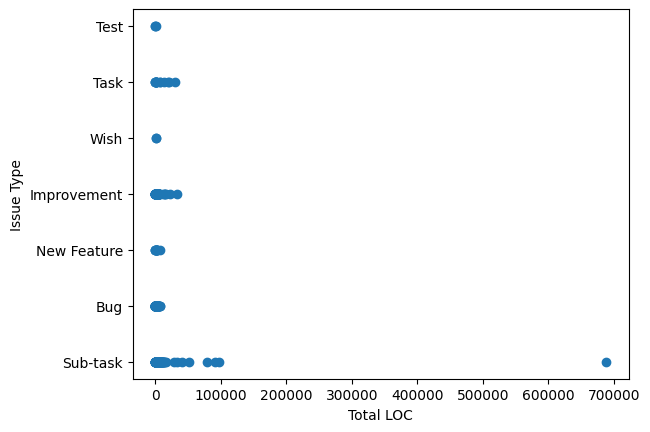

In [20]:
#draw chart Issye Type vs nloc
plt.scatter(cleaned_rows_with_jira['nloc'], cleaned_rows_with_jira['issue type'])

#add axis titles
plt.xlabel('Total LOC')
plt.ylabel('Issue Type')


Text(0, 0.5, 'Issue Type')

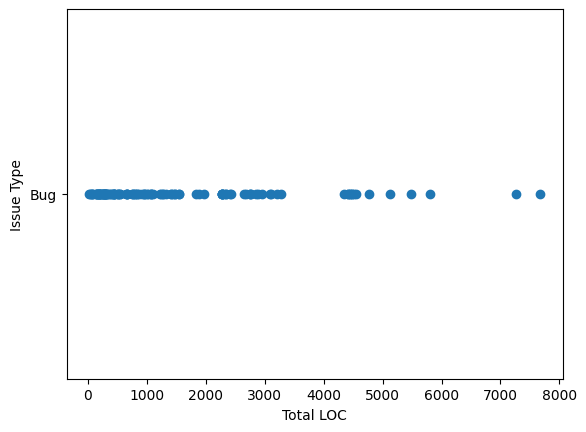

In [23]:
#filter isue type Bug
rows_with_jira_bug = cleaned_rows_with_jira[cleaned_rows_with_jira['issue type'] == 'Bug']

#draw chart for issue type bug vs nloc
plt.scatter(rows_with_jira_bug['nloc'], rows_with_jira_bug['issue type'])

#add axis titles
plt.xlabel('Total LOC')
plt.ylabel('Issue Type')


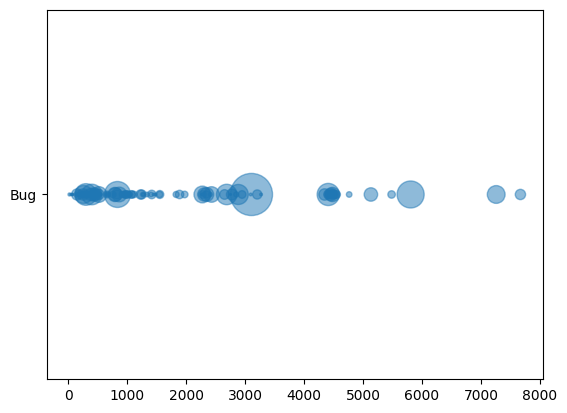

In [25]:
#edit the same chart to show the added_lines and deleted_lines in addition to nloc, use a different color for added_lines and deleted_lines
plt.scatter(rows_with_jira_bug['nloc'], rows_with_jira_bug['issue type'], s=rows_with_jira_bug['added_lines'], alpha=0.5)

#plt.scatter(rows_with_jira_bug['nloc'], rows_with_jira_bug['issue type'], s=rows_with_jira_bug['added_lines'], alpha=0.5)

# Visualize the normality of dependent variables

Notes:

sns.distplot() is a function in the Seaborn data visualization library used to plot a histogram and an estimate of the probability density function (PDF) of a continuous variable. The plot shows the distribution of a dataset by computing a histogram and fitting a kernel density estimate (KDE) to the data.

Here's how it works:

It takes a continuous variable as input and plots a histogram of that variable
It estimates the density function of that variable using kernel density estimation (KDE) and overlays it on top of the histogram
The resulting plot gives us a visual representation of the data distribution and its underlying probability density function.
sns.distplot() also offers many options for customizing the plot, including the choice of bin size, KDE bandwidth, color, and more.



Regenerate response

In [ ]:
#Install seaborn
%pip install seaborn

C:\Users\randi\AppData\Local\Temp\ipykernel_13604\1938836935.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rows_with_jira_bug['added_lines'], ax=ax[0])
C:\Users\randi\AppData\Local\Temp\ipykernel_13604\1938836935.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rows_with_jira_bug['delet

Text(0.5, 1.0, 'Issue Type Bug vs Deleted Lines')

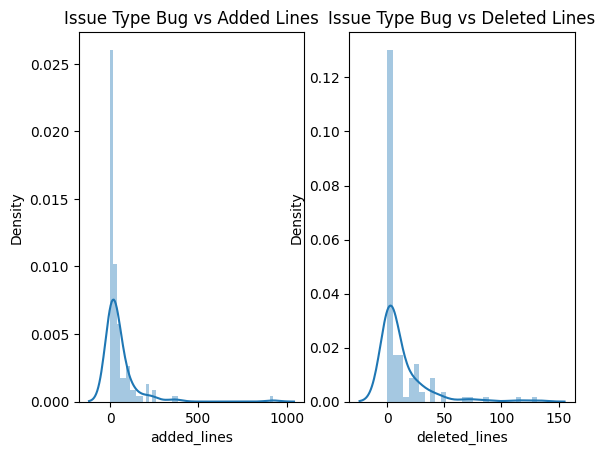

In [29]:
import seaborn as sns

fig, ax=plt.subplots(1,2)

sns.distplot(rows_with_jira_bug['added_lines'], ax=ax[0])
ax[0].set_title('Issue Type Bug vs Added Lines')

sns.distplot(rows_with_jira_bug['deleted_lines'], ax=ax[1])
ax[1].set_title('Issue Type Bug vs Deleted Lines')


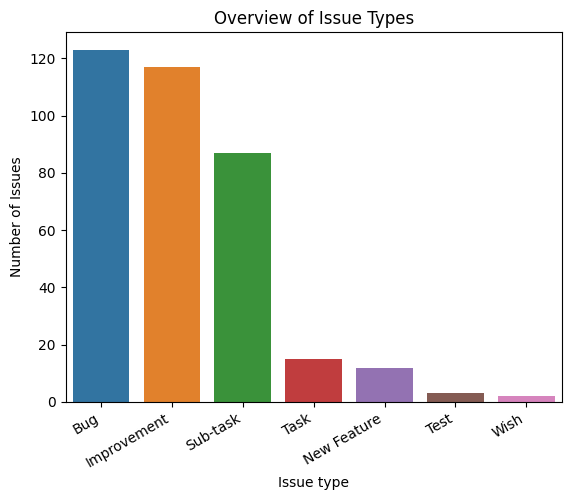

In [30]:
d = cleaned_rows_with_jira

ax_issue_types = sns.countplot(data=d, x='issue type', order=d['issue type'].value_counts().index)
ax_issue_types.set(xlabel='Issue type', ylabel='Number of Issues', title='Overview of Issue Types')
plt.setp(ax_issue_types.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show(ax_issue_types)

In [53]:
#Extract time in dev, priority from Jira and add to the dataframe

import pandas as pd
from jira import JIRA
from datetime import datetime

jira = JIRA('https://issues.apache.org/jira') 

#read csv 
new_data_df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\sample_main_rows_with_aggregated_data_with_jira.csv')
new_main_rows = new_data_df[new_data_df['hash'].notna()]

#add new columns 'priority' and 'time_spent' to dataframe
new_data_df['priority'] = ''
new_data_df['time_spent'] = ''

def get_time_spent(issue):
    # Extract the start and end timestamps
    start_time = datetime.strptime(issue.fields.created, '%Y-%m-%dT%H:%M:%S.%f%z')
    end_time = datetime.strptime(issue.fields.resolutiondate, '%Y-%m-%dT%H:%M:%S.%f%z')
    # Calculate the time taken to resolve the issue
    time_spent = end_time - start_time
    return time_spent

indices = new_main_rows.index.to_list()
indices.append(len(new_data_df))

for i in range(len(indices)):
    if i + 1 < len(indices):
    #if i + 1 < 50:
        issue_key = new_data_df.loc[indices[i], 'jira issue key']
        issue = jira.issue(issue_key)  
        new_data_df.loc[indices[i], ['priority']] = [issue.fields.priority.name]
        #check if the issue is resolved
        if issue.fields.resolutiondate is not None:
            new_data_df.loc[indices[i], ['time_spent']] = [get_time_spent(issue)]
      
new_data_df.to_csv('c:\\CodeBook\\new_code_rework_TD\\git_and_jira_data_comp.csv', index=False)


In [ ]:
#Time in dev per issue type - this code needs to be modified/ fixed to interpret 'time_spent' - perhaps first convert it to a number e.g., seconds

d = cleaned_rows_with_jira

def show_time_in_development_per_issue_type(d):
    ax = sns.barplot(x="issue type", y="time_spent", data=d, order=d['issue type'].value_counts().index, palette="Blues_d")
    ax.set(xlabel='Issue Type', ylabel='Time spent in development', title='Time spent in development per Issue Type')
    plt.show(ax)
    
show_time_in_development_per_issue_type(d)

In [54]:
d['issue type'].value_counts().index

Index(['Bug', 'Improvement', 'Sub-task', 'Task', 'New Feature', 'Test',
       'Wish'],
      dtype='object')